In [ ]:
# Run this cell only if packages aren't already installed
%pip install pandas matplotlib seaborn prophet scikit-learn

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
df = pd.read_csv(r"C:\Users\shada\Downloads\Time_Series.csv")
df.head()

,DATE_TIME,VOLUME,RESP_AVG
0,2025-03-22 8:00:00,442,7.085964
1,2025-03-22 9:00:00,418,8.405124
2,2025-03-22 11:00:00,507,7.779719
3,2025-03-22 12:00:00,559,6.877425
4,2025-03-22 13:00:00,602,8.178685


In [50]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.set_index('DATE_TIME', inplace=True)

In [51]:
df.head()

,VOLUME,RESP_AVG
DATE_TIME,,
2025-03-22 08:00:00,442,7.085964
2025-03-22 09:00:00,418,8.405124
2025-03-22 11:00:00,507,7.779719
2025-03-22 12:00:00,559,6.877425
2025-03-22 13:00:00,602,8.178685


Basic Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1706 entries, 2025-03-22 08:00:00 to 2025-06-15 07:00:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VOLUME    1706 non-null   int64  
 1   RESP_AVG  1706 non-null   float64
 2   zscore    1706 non-null   float64
 3   anomaly   1706 non-null   bool   
dtypes: bool(1), float64(2), int64(1)
memory usage: 119.5 KB

Summary Statistics:



,VOLUME,RESP_AVG,zscore
count,1706.000000,1706.000000,1.706000e+03
mean,2640.644197,7.848615,-5.154142e-17
std,2410.114417,2.171984,1.000000e+00
min,362.000000,4.594024,-1.498441e+00
25%,1136.000000,6.904281,-4.347795e-01
50%,2052.500000,7.694853,-7.079360e-02
75%,3297.000000,8.506829,3.030473e-01
max,23259.000000,64.354239,2.601567e+01


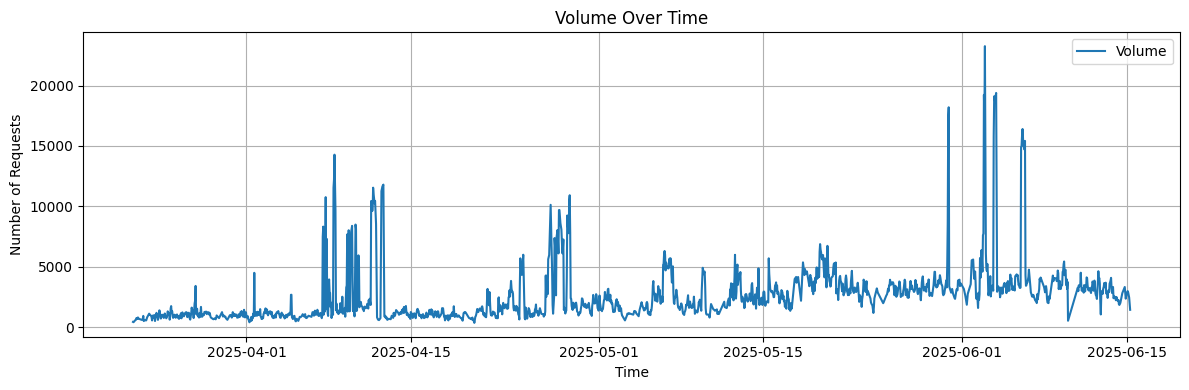

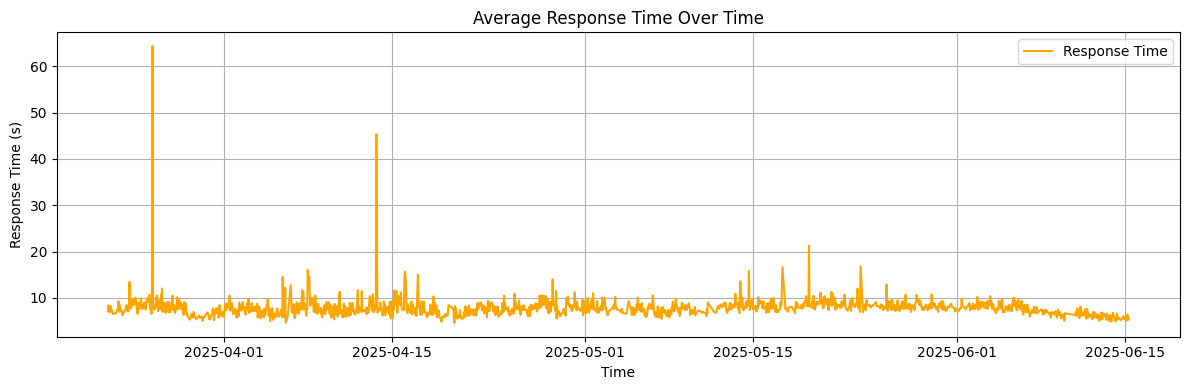

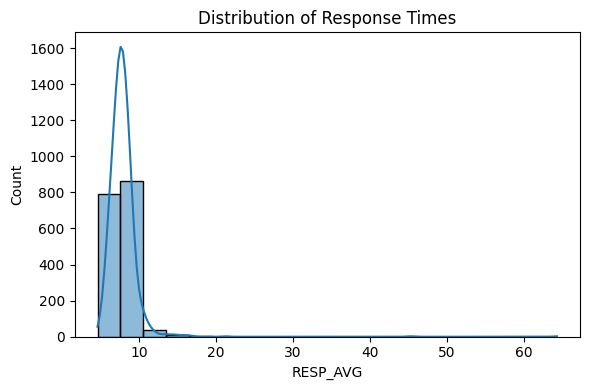

In [57]:
print("Basic Info:\n")
df.info()

print("\nSummary Statistics:\n")
display(df.describe())


# Volume over time
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df["VOLUME"], label="Volume")
plt.title("Volume Over Time")
plt.ylabel("Number of Requests")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Response Time over time
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df["RESP_AVG"], color="orange", label="Response Time")
plt.title("Average Response Time Over Time")
plt.ylabel("Response Time (s)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["RESP_AVG"], bins=20, kde=True)
plt.title("Distribution of Response Times")
plt.tight_layout()
plt.show()

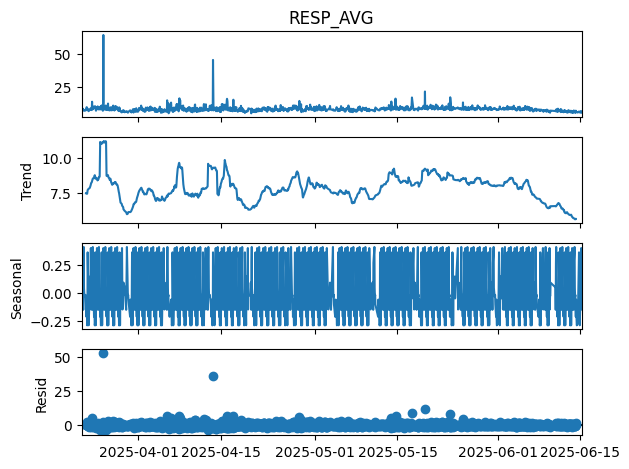

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['RESP_AVG'], model='additive', period=24)  # if hourly, period=24 for daily seasonality
result.plot()
plt.show()


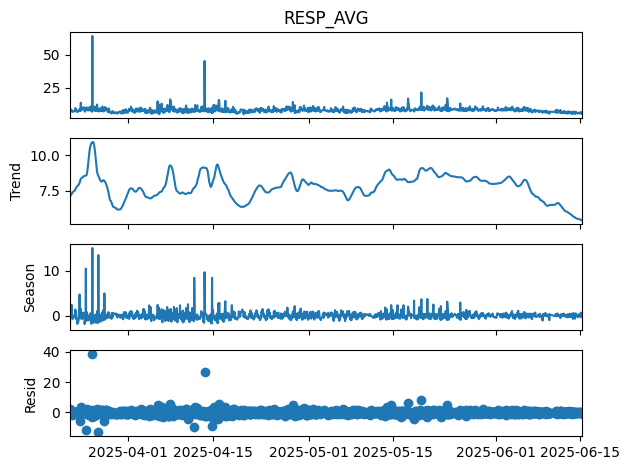

In [63]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['RESP_AVG'], period=24)  # for hourly data with daily pattern
res = stl.fit()
res.plot()
plt.show()

In [53]:
# Create full hourly time range from start to end
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

#  Identify missing timestamps
missing_timestamps = full_range.difference(df.index)

# Convert to DataFrame for grouping
missing_df = pd.DataFrame(missing_timestamps, columns=['DATE_TIME'])
missing_df['month'] = missing_df['DATE_TIME'].dt.to_period('M')

# Count missing hours per month
missing_hours_per_month = missing_df.groupby('month').size()
missing_hours_per_month


C:\Users\shada\AppData\Local\Temp\ipykernel_17380\3589595301.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


month
2025-03     44
2025-04     91
2025-05    128
2025-06     71
Freq: M, dtype: int64

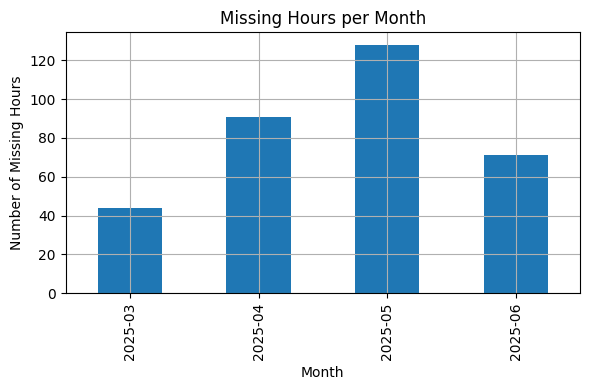

In [54]:
missing_hours_per_month.plot(kind='bar', figsize=(6, 4))
plt.title("Missing Hours per Month")
plt.xlabel("Month")
plt.ylabel("Number of Missing Hours")
plt.grid(True)
plt.tight_layout()
plt.show()

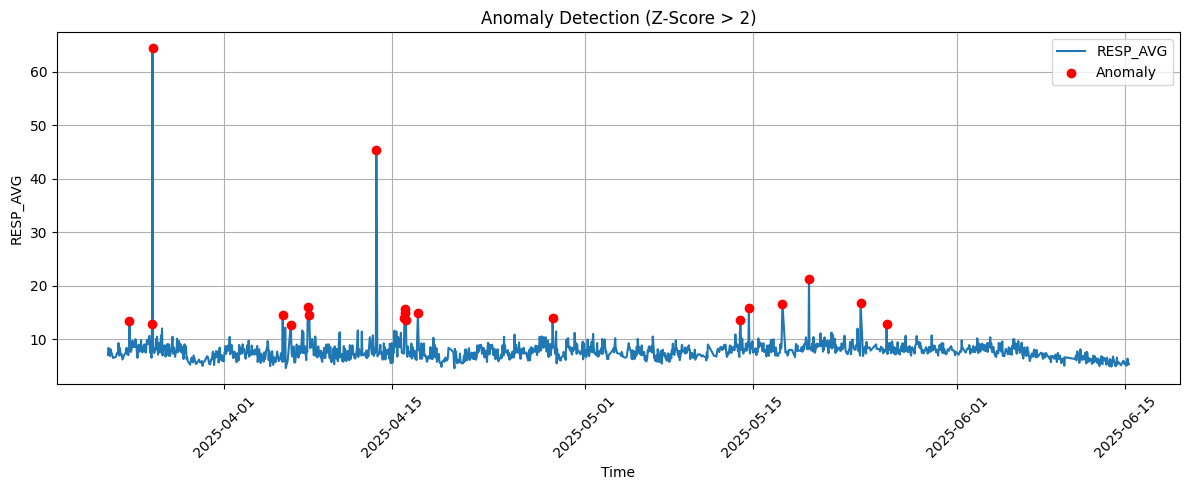

,VOLUME,RESP_AVG,zscore,anomaly
DATE_TIME,,,,
2025-03-24 03:00:00,886,13.432887,2.571046,True
2025-03-26 00:00:00,841,12.889684,2.320951,True
2025-03-26 01:00:00,1016,64.354239,26.015669,True
2025-04-05 21:00:00,1000,14.495870,3.060452,True
2025-04-06 13:00:00,861,12.760435,2.261443,True
2025-04-07 23:00:00,938,16.011548,3.758283,True
2025-04-08 02:00:00,2927,14.526119,3.074379,True
2025-04-13 16:00:00,1003,45.307772,17.246513,True
2025-04-16 00:00:00,1030,14.017014,2.839983,True


In [55]:
# Calculate Z-scores

df['zscore'] = (df['RESP_AVG'] - df['RESP_AVG'].mean()) / df['RESP_AVG'].std()
df['anomaly'] = df['zscore'].abs() > 2  # threshold can be tuned

# Plot with anomalies
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['RESP_AVG'], label='RESP_AVG')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['RESP_AVG'],
            color='red', label='Anomaly', zorder=5)
plt.title("Anomaly Detection (Z-Score > 2)")
plt.xlabel("Time")
plt.ylabel("RESP_AVG")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show anomalies
df[df['anomaly']]


In [70]:
# Reset index to have 'ds' and 'y' for Prophet and baseline models
df_model = df.reset_index()[['DATE_TIME', 'RESP_AVG']]
df_model.columns = ['ds', 'y']

# rain-Test Split (last 30 days as test)
train = df_model.iloc[:-24*30]
test = df_model.iloc[-24*30:]

# Show splits
print("Train Set:")
display(train_df.shape)

print("\nTest Set:")
display(test_df.shape)

Train Set:


(1433, 3)


Test Set:


(273, 2)

In [71]:
# Use average of last 3 values from train data
window_size = 3
sma_value = train_df['y'].iloc[-window_size:].mean()
sma_forecast = [sma_value] * len(test_df)

# Evaluation
sma_mae = mean_absolute_error(test_df['y'], sma_forecast)
sma_rmse = mean_squared_error(test_df['y'], sma_forecast)
sma_mape = np.mean(np.abs((test_df['y'] - sma_forecast) / test_df['y'])) * 100

print("Simple Moving Average Forecast:")
print(f"MAE:  {sma_mae:.4f}")
print(f"RMSE: {sma_rmse:.4f}")
print(f"MAPE: {sma_mape:.2f}%")

Simple Moving Average Forecast:
MAE:  0.9940
RMSE: 1.4246
MAPE: 14.67%


In [78]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Fit Seasonal Model
model = ExponentialSmoothing(
    train['y'],
    trend='add',
    seasonal='mul',
    seasonal_periods=24  # Daily seasonality for hourly data
)

fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(len(test))

# Evaluation
mse = mean_absolute_error(test['y'], forecast)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(test['y'], forecast)

# STEP 6: Print Results
print("Holt Winter:")
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

Holt Winter:
MSE: 0.98
RMSE: 0.99
MAPE: 13.14%
